# **GANJAR PRANOWO**

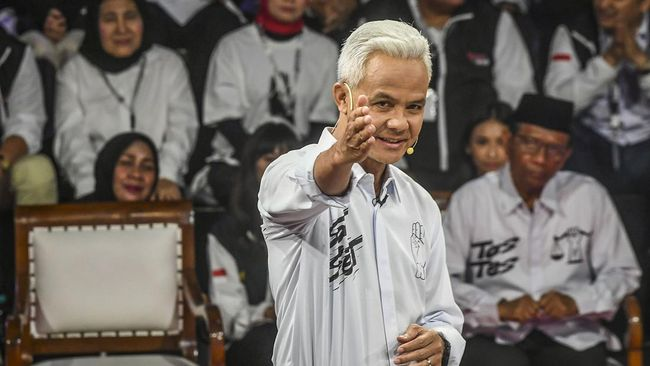

Proyek ini bertujuan untuk melakukan analisis sentimen terhadap debat Calon Presiden Indonesia 2024, fokus pada Ganjar Pranowo, melalui persepsi masyarakat yang tercermin dalam platform Twitter. Data untuk analisis diperoleh melalui proses crawling pada Twitter, dengan rentang tanggal 12 Desember 2023 hingga 22 Desember 2023.

Metode yang digunakan dalam proyek ini mencakup pengumpulan data melalui crawling, pengolahan teks untuk mengekstrak informasi relevan, dan analisis sentimen untuk menilai respons masyarakat terhadap kinerja dan pandangan Ganjar Pranowo dalam debat. Tujuan utama dari analisis sentimen ini adalah untuk memahami sejauh mana tanggapan positif, negatif, atau netral dari masyarakat terhadap berbagai aspek debat yang melibatkan Calon Presiden tersebut.


## ***IMPORT LIBRARY***

Proyek ini merupakan implementasi analisis data menggunakan Python, dengan pemanfaatan beberapa pustaka kunci seperti Pandas, re, Seaborn, dan Matplotlib.

*   Pandas
*   re
*   Seaborn
*   Matplotlib

Dengan memanfaatkan Pandas, proyek ini memungkinkan pengguna untuk melakukan manipulasi data yang efisien, termasuk pemfilteran dan pengelompokan data. Selain itu, modul re digunakan untuk melakukan operasi pencarian dan pemfilteran berbasis pola pada data.

Seaborn dan Matplotlib digunakan untuk merancang visualisasi data yang menarik dan informatif. Seaborn memberikan antarmuka yang mudah digunakan untuk menghasilkan plot statistik yang elegan, sementara Matplotlib memberikan fleksibilitas lebih lanjut dalam desain dan penyesuaian grafik

In [121]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

## ***Mounting Google Drive***

Mounting Google Drive menghubungkan Google Colab dengan Google Drive pengguna, sehingga memungkinkan akses mudah ke berkas dan dataset yang tersimpan di Drive.

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Membaca Dataset**

In [123]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/ganjar.csv')  #Membaca Dataset yang sudah di upload dalam Google Drive
df.head() #Menampilkan 5 baris pertama

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 10:31:40 +0000 2023,1735608555141730048,"Ganjar Pranowo dan Pak Mahfud MD, semoga kepem...",0,0,0,0,in,1690610120311589888,1735608555141730048,firdaraisyaa,https://twitter.com/firdaraisyaa/status/173560...
1,1,Fri Dec 15 10:31:40 +0000 2023,1735608554323950080,"Ganjar Pranowo, gubernur yang bisa menjadi ins...",0,0,0,0,in,1691369523004489984,1735608554323950080,zaraauliaaia,https://twitter.com/zaraauliaaia/status/173560...
2,2,Fri Dec 15 10:31:39 +0000 2023,1735608552843259904,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,0,0,0,0,in,"1,69E+18",1735608552843259904,adamalvnto1,https://twitter.com/adamalvnto1/status/1735608...
3,3,Fri Dec 15 10:31:38 +0000 2023,1735608549248719872,Mengagumi betapa Mas Ganjar mampu menjaga kese...,0,0,0,0,in,1689128132589329920,1735608549248719872,ZivaOktavia,https://twitter.com/ZivaOktavia/status/1735608...
4,4,Fri Dec 15 10:31:38 +0000 2023,1735608548602889984,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,0,0,0,0,in,1688485501551160064,1735608548602889984,dindafiitriii,https://twitter.com/dindafiitriii/status/17356...


In [124]:
df = df[['full_text','username','created_at']] #mengambil 3 atribut/kolom
df #Menyimpan kembali dalam DataFrame

,full_text,username,created_at
0,"Ganjar Pranowo dan Pak Mahfud MD, semoga kepem...",firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023
1,"Ganjar Pranowo, gubernur yang bisa menjadi ins...",zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023
2,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023
3,Mengagumi betapa Mas Ganjar mampu menjaga kese...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023
4,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023
...,...,...,...
245,"Ganjar Pranowo dan Pak Mahfud MD, semoga visi ...",LidyaLestri,Fri Dec 15 10:35:33 +0000 2023
246,"Mahfud MD, harapan kami agar kehadiran Anda da...",trnutyantiiiiii,Fri Dec 15 10:35:32 +0000 2023
247,tidak kompeten dalam mengelola krisis ekonomi ...,HaruniWinddd,Fri Dec 15 10:35:31 +0000 2023
248,Keharmonisan keluarga Ganjar Pranowo adalah ni...,wativinaaaaa,Fri Dec 15 10:35:31 +0000 2023


## ***Cleaning Data***

In [125]:
df.shape #Menampilkan Dimensi Data Frame

(250, 3)

### *Menghapus Nilai Duplkat*

In [126]:
df = df.drop_duplicates(subset=['full_text']) #Menghapus nilai duplikat dalam kolom 'full_text'

In [127]:
df.duplicated().sum() #menghitung nilai duplikat

0

### *Menghapus Nilai NaN/Hilang*

In [128]:
df = df.dropna() #Menghapus nilai NaN/hilang

In [129]:
df.isnull().sum() #Menghitung nilai Nan/hilang

full_text     0
username      0
created_at    0
dtype: int64

In [130]:
df.shape #dimensi data setelah melakukan Cleaning Data

(250, 3)

### *Clean Twitter Text*

In [131]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)  #Menghapus semua mention (username) dari teks tweet.
  text = re.sub(r'#\w+', '', text) #Menghapus semua hashtag dari teks tweet.
  text = re.sub(r'RT[\s]+', '', text) #Menghapus istilah "RT" yang menandakan retweet.
  text = re.sub(r'https?://\S+', '', text) #Menghapus URL dari teks tweet.

  text = re.sub(r'[^A-Za-z0-9 ]', '', text) #Menyaring hanya karakter alfanumerik dari teks tweet.
  text = re.sub(r'\s+', ' ', text).strip() #Menghapus spasi yang berlebihan dan memastikan tidak ada spasi di awal atau akhir teks
  return text

df['clean_twitter_text'] = df['full_text'].apply(clean_twitter_text)
df.head()

,full_text,username,created_at,clean_twitter_text
0,"Ganjar Pranowo dan Pak Mahfud MD, semoga kepem...",firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023,Ganjar Pranowo dan Pak Mahfud MD semoga kepemi...
1,"Ganjar Pranowo, gubernur yang bisa menjadi ins...",zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023,Ganjar Pranowo gubernur yang bisa menjadi insp...
2,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023,Kebersamaan Ganjar dan Mahfud sebagai tim adal...
3,Mengagumi betapa Mas Ganjar mampu menjaga kese...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023,Mengagumi betapa Mas Ganjar mampu menjaga kese...
4,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...


### *Mengubah Lowwercase / huruf kecil*

In [132]:
def lowercase(text):
  text = text.lower()
  return text

df['lowercase'] = df['clean_twitter_text'].apply(lowercase)
df.head()


,full_text,username,created_at,clean_twitter_text,lowercase
0,"Ganjar Pranowo dan Pak Mahfud MD, semoga kepem...",firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023,Ganjar Pranowo dan Pak Mahfud MD semoga kepemi...,ganjar pranowo dan pak mahfud md semoga kepemi...
1,"Ganjar Pranowo, gubernur yang bisa menjadi ins...",zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023,Ganjar Pranowo gubernur yang bisa menjadi insp...,ganjar pranowo gubernur yang bisa menjadi insp...
2,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,kebersamaan ganjar dan mahfud sebagai tim adal...
3,Mengagumi betapa Mas Ganjar mampu menjaga kese...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023,Mengagumi betapa Mas Ganjar mampu menjaga kese...,mengagumi betapa mas ganjar mampu menjaga kese...
4,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,semoga ganjar pranowo dan mahfud md dapat memb...


## **Preprocessing**

### *Normalisasi*

Normalisasi adalah proses membuat data atau teks menjadi lebih seragam atau standar. Pada konteks pemrosesan teks seperti yang terlihat pada coding di atas, normalisasi dilakukan untuk menggantikan kata-kata atau frasa-frasa tertentu dengan bentuk standar atau lebih umum. Ini membantu dalam menghilangkan variasi yang tidak perlu dalam teks.

In [133]:
normalization_dict = {
    " anies ": " ",
    " prabowo ": " ",
    " yg ": " yang ",
    "kmrn": "kemarin",
    "sngt": "sangat",
    "tuch": "itu",
    " lu ": " kamu ",
    " gamau ": " tidak mau ",
    " nyalonin ": " mencalonkan ",
    " karenaaa ": " karena ",
    " udh ": " sudah ",
    " ama ": " dengan ",
    " gw ": " saya ",
    " bareng ": " bersama ",
    " gmn ": " bagaimana ",
    " ga ": " tidak ",
    " yaa ": " ya ",
    " yg ": " yang ",
    " jg ": " juga ",
    " udah ": " sudah ",
    " gt ": " begitu ",
}

def normalisasi(str_text):
  for i in normalization_dict:
    str_text = str_text.replace(i, normalization_dict[i])
  return str_text

df['normalisasi'] = df['lowercase'].apply(lambda x: normalisasi(x))
df.head()

,full_text,username,created_at,clean_twitter_text,lowercase,normalisasi
0,"Ganjar Pranowo dan Pak Mahfud MD, semoga kepem...",firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023,Ganjar Pranowo dan Pak Mahfud MD semoga kepemi...,ganjar pranowo dan pak mahfud md semoga kepemi...,ganjar pranowo dan pak mahfud md semoga kepemi...
1,"Ganjar Pranowo, gubernur yang bisa menjadi ins...",zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023,Ganjar Pranowo gubernur yang bisa menjadi insp...,ganjar pranowo gubernur yang bisa menjadi insp...,ganjar pranowo gubernur yang bisa menjadi insp...
2,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,kebersamaan ganjar dan mahfud sebagai tim adal...,kebersamaan ganjar dan mahfud sebagai tim adal...
3,Mengagumi betapa Mas Ganjar mampu menjaga kese...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023,Mengagumi betapa Mas Ganjar mampu menjaga kese...,mengagumi betapa mas ganjar mampu menjaga kese...,mengagumi betapa mas ganjar mampu menjaga kese...
4,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,semoga ganjar pranowo dan mahfud md dapat memb...,semoga ganjar pranowo dan mahfud md dapat memb...


Jadi, secara keseluruhan, fungsi normalisasi dan kamus normalization_dict digunakan untuk menggantikan kata-kata atau frasa-frasa tertentu dengan bentuk yang telah ditentukan, sehingga membuat teks menjadi lebih seragam dan lebih mudah diolah.

### Install Sastrawi


Sastrawi adalah sebuah library untuk pemrosesan bahasa alami (Natural Language Processing atau NLP) dalam bahasa Indonesia. Fungsinya adalah untuk membantu dalam melakukan beberapa tugas pemrosesan teks, seperti menghilangkan kata-kata umum (stop words) dan stemming (mengembalikan kata ke bentuk dasarnya).

In [134]:
!pip install Sastrawi

### *StopWords*

In [135]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# Mendapatkan daftar stop words dari Sastrawi
existing_stop_words = StopWordRemoverFactory().get_stop_words()

# Menambahkan stop words tambahan sesuai dengan kebutuhan
additional_stop_words = [
    'anda', 'bisa', 'dalam', 'dan', 'dapat',
    'dengan', 'di', 'jadi', 'ke', 'masih',
    'menjadi', 'nya', 'oleh', 'pada', 'saja',
    'sebagai', 'sebuah', 'semua', 'seperti',
    'serta', 'sukses', 'telah', 'terhadap',
    'terima', 'tersebut', 'untuk', 'yang',
    'ada', 'adalah', 'akan', 'sehingga',
    'sampai', 'tetapi', 'sejak', 'keluarga']


# Menggabungkan daftar stop words dari Sastrawi dengan stop words tambahan
combined_stop_words = existing_stop_words + additional_stop_words

# Membuat objek ArrayDictionary dari daftar stop words yang sudah diperbarui
new_array = ArrayDictionary(combined_stop_words)

# Membuat objek StopWordRemover dengan menggunakan ArrayDictionary yang baru
stop_word_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    # Menghapus stop words dari teks
    str_text = stop_word_remover_new.remove(str_text)
    return str_text

# Menerapkan fungsi stopword pada kolom 'normalisasi' DataFrame
df['full_text'] = df['normalisasi'].apply(lambda x: stopword(x))

# Menampilkan lima baris pertama dari DataFrame yang sudah diupdate
df.head()


,full_text,username,created_at,clean_twitter_text,lowercase,normalisasi
0,ganjar pranowo pak mahfud md semoga kepemimpin...,firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023,Ganjar Pranowo dan Pak Mahfud MD semoga kepemi...,ganjar pranowo dan pak mahfud md semoga kepemi...,ganjar pranowo dan pak mahfud md semoga kepemi...
1,ganjar pranowo gubernur bisa inspirasi kemampu...,zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023,Ganjar Pranowo gubernur yang bisa menjadi insp...,ganjar pranowo gubernur yang bisa menjadi insp...,ganjar pranowo gubernur yang bisa menjadi insp...
2,kebersamaan ganjar mahfud tim kunci keberhasil...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,kebersamaan ganjar dan mahfud sebagai tim adal...,kebersamaan ganjar dan mahfud sebagai tim adal...
3,mengagumi betapa mas ganjar mampu menjaga kese...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023,Mengagumi betapa Mas Ganjar mampu menjaga kese...,mengagumi betapa mas ganjar mampu menjaga kese...,mengagumi betapa mas ganjar mampu menjaga kese...
4,semoga ganjar pranowo mahfud md membawa semang...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,semoga ganjar pranowo dan mahfud md dapat memb...,semoga ganjar pranowo dan mahfud md dapat memb...


### *Tokenize*

Tokenization adalah proses memecah teks menjadi bagian-bagian yang lebih kecil yang disebut token. Token dapat berupa kata, frasa, atau bagian-bagian lain dari teks yang memiliki makna. Proses tokenization adalah langkah awal dalam pemrosesan teks, dan setiap unit kecil yang dihasilkan oleh tokenization disebut sebagai token.

In [136]:
## Tokenization: Memecah teks menjadi token
tokenized = df['full_text'].apply(lambda x: x.split())
tokenized

0      [ganjar, pranowo, pak, mahfud, md, semoga, kep...
1      [ganjar, pranowo, gubernur, bisa, inspirasi, k...
2      [kebersamaan, ganjar, mahfud, tim, kunci, kebe...
3      [mengagumi, betapa, mas, ganjar, mampu, menjag...
4      [semoga, ganjar, pranowo, mahfud, md, membawa,...
                             ...                        
245    [ganjar, pranowo, pak, mahfud, md, semoga, vis...
246    [mahfud, md, harapan, agar, kehadiran, dapat, ...
247      [kompeten, mengelola, krisis, ekonomi, terjadi]
248    [keharmonisan, ganjar, pranowo, nilai, tambah,...
249    [dianggap, lambat, kurang, responsif, menangga...
Name: full_text, Length: 250, dtype: object

Contoh hasil output yang Anda berikan menunjukkan bahwa setiap baris di DataFrame tersebut sekarang berisi daftar token yang terpisah untuk setiap kata dalam teks. Misalnya, baris pertama menunjukkan daftar token untuk teks pertama, baris kedua untuk teks kedua, dan seterusnya. Setiap kata dalam teks dipecah menjadi satu elemen dalam daftar token.

### *Steming*


Stemming adalah proses dalam pemrosesan bahasa alami yang bertujuan untuk mengembalikan kata-kata ke bentuk dasarnya atau kata dasar. Tujuan utama dari stemming adalah untuk mengurangi kata-kata ke akar kata atau bentuk dasarnya sehingga kata-kata yang memiliki akar kata yang sama akan diperlakukan seragam.

In [137]:
# Import library Sastrawi dan modul StemmerFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi untuk proses stemming pada teks
def stemming(text_cleaning):
  # Membuat objek StemmerFactory
  factory = StemmerFactory()
  # Membuat objek stemmer menggunakan StemmerFactory
  stemmer = factory.create_stemmer()

  # Inisialisasi list untuk menampung hasil stemming
  do = []

  # Looping untuk melakukan stemming pada setiap token
  for w in text_cleaning:
    # Melakukan stemming pada kata dan menambahkannya ke list 'do'
    dt = stemmer.stem(w)
    do.append(dt)

  # Menggabungkan hasil stemming menjadi satu string
  d_clean = " ".join(do)

  # Menampilkan hasil stemming
  print(d_clean)

  # Mengembalikan teks yang telah di-stemming
  return d_clean

# Mengaplikasikan fungsi stemming pada setiap baris teks dalam DataFrame 'tokenized'
tokenized = tokenized.apply(stemming)


ganjar pranowo pak mahfud md moga pimpin pancar hangat dalam gp 4presiden
ganjar pranowo gubernur bisa inspirasi mampu satu seni politik gp 4presiden
sama ganjar mahfud tim kunci hasil maju indonesia gp 4presiden
kagum betapa mas ganjar mampu jaga imbang tugas pimpin peran kepala gp 4presiden
moga ganjar pranowo mahfud md bawa semangat sama dalam bijak nasional gp 4presiden
banyak ragu komitmen pak ganjar tangan masalah korupsi daerah
bagi orang dapat program sejahtera canang pak ganjar milik potensi baik masih perlu evaluasi lebih lanjut gp 4presiden
selalu mas ganjar pranowo pak mahfud md adalah tim potensi bawa maju besar jatim gp 4presiden
ganjar malam kurang baik debat lihat wasit
sukses ganjar pranowo canda bukti pimpin ceria mampu buat putus bijak gp 4presiden
jakarta butuh pimpin ganjar pranowo milik pimpin visioner nilainilai yang kuat gp 4presiden
belum percaya kerja pak ganjar banyak jalan rusak
ganjar pranowo mahfud md sosok milik visi jalan mesra keluarga nilai tambah pimp

Proses stemming membantu mengurangi variasi kata ke dalam bentuk dasarnya, sehingga mempermudah analisis teks dan memastikan kata-kata yang memiliki akar kata yang sama diperlakukan seragam.

In [138]:
# Menyimpan DataFrame 'tokenized' ke dalam file CSV
tokenized.to_csv("/content/drive/MyDrive/DATASET/hasilganjar.csv", index=False)

# Membaca data dari file CSV yang disimpan sebelumnya
data = pd.read_csv("/content/drive/MyDrive/DATASET/hasilganjar.csv", encoding='latin1')


Setelah eksekusi kode ini, data yang telah diolah dan di-stemming dalam DataFrame tokenized akan tersimpan sebagai file CSV dengan nama "hasilganjar.csv" dan dapat diakses kembali menggunakan DataFrame data

### *Translate*

In [139]:
!pip install googletrans==4.0.0-rc1

In [140]:
import pandas as pd
from googletrans import Translator
data = pd.read_csv("/content/drive/MyDrive/DATASET/hasilganjar.csv", encoding='latin1')
data.head()

,full_text
0,ganjar pranowo pak mahfud md moga pimpin panca...
1,ganjar pranowo gubernur bisa inspirasi mampu s...
2,sama ganjar mahfud tim kunci hasil maju indone...
3,kagum betapa mas ganjar mampu jaga imbang tuga...
4,moga ganjar pranowo mahfud md bawa semangat sa...


In [141]:
import pandas as pd
from googletrans import Translator

# Fungsi untuk terjemahan
def convert_eng(tweet):
    try:
        translator = Translator()
        translation = translator.translate(tweet, src='id', dest='en')
        return translation.text
    except Exception as e:
        print(f"Error translating: {e}")
        return None

# Menerapkan fungsi terjemahan pada kolom 'full_text'
data["tweet_english"] = data['full_text'].apply(convert_eng)

# Membersihkan dan memproses kolom 'tweet_english'
data['tweet_english'] = data['tweet_english'].str.replace('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ')
data['tweet_english'] = data['tweet_english'].str.lower()

# Menyimpan DataFrame yang sudah diupdate ke dalam file CSV
data.to_csv("/content/drive/MyDrive/DATASET/tweetenglishganjarr.csv", index=False)


<ipython-input-141-d1fb6a0f2829>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tweet_english'] = data['tweet_english'].str.replace('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ')


Menerjemahkan teks ke bahasa Inggris sebelum melakukan analisis sentimen memiliki beberapa manfaat utama:

1. **Konsistensi Bahasa:**
   - Menerjemahkan ke bahasa Inggris menjaga konsistensi dalam analisis sentimen di seluruh dataset, memastikan keseragaman dalam penggunaan model.

2. **Ketersediaan Model Sentimen:**
   - Model sentimen lebih tersedia dan terlatih dengan baik untuk bahasa Inggris, meningkatkan akurasi analisis sentimen.

3. **Perbandingan yang Mudah:**
   - Menerjemahkan ke bahasa Inggris mempermudah perbandingan hasil sentimen dengan literatur dan penelitian lain yang umumnya berfokus pada bahasa Inggris.

4. **Fleksibilitas NLP:**
   - Bahasa Inggris mendukung alat dan teknik pemrosesan bahasa alami (NLP) yang lebih canggih, meningkatkan fleksibilitas dalam analisis.

5. **Kontrol Kualitas Terjemahan:**
   - Terjemahan ke bahasa Inggris dapat diawasi dan dievaluasi untuk memilih layanan terjemahan yang memberikan hasil terbaik untuk konteks tertentu.

### *Labeling*

Labeling dalam konteks analisis sentimen adalah proses menetapkan label atau kategori tertentu (seperti "Positif," "Netral," atau "Negatif") pada setiap teks atau dokumen berdasarkan sentimen atau perasaan yang terkandung di dalamnya. Tujuannya adalah untuk mengkategorikan teks-teks tersebut sesuai dengan polaritas emosionalnya.

In [142]:
data = pd.read_csv("/content/drive/MyDrive/DATASET/tweetenglishganjar.csv", index_col=0)
data

,full_text,tweet_english
0,ganjar pranowo pak mahfud md moga pimpin kalia...,eagerness pranowo pak mahfud md may lead you t...
1,dukung mas ganjar pak mahfud dukung pimpin pah...,support mas ganjar pak mahfud support to lead ...
2,ganjar pranowo gubernur jadi inspirasi mampu s...,ganjar pranowo governor can be an inspiration ...
3,ganjar pranowo mahfud md pimpin komitmen jabat...,eagerness pranowo mahfud md lead not the commi...
4,sama ganjar mahfud tim kunci hasil maju indonesia,same odd mahfud key team results advanced indo...
...,...,...
245,ganjar pranowo cermin sikap progresif tangan i...,eagle pranowo mirror progressive attitude hand...
246,orang pimpin cipta harmoni rumah cipta harmoni...,people lead create harmony home definitely cre...
247,dekat mas ganjar keluarga gambar hasil orang p...,near Mas ganjar family picture of the results ...
248,moga energi positif keluarga ganjar pranowo ja...,may the positive energy of the family of ganja...


In [143]:
data.columns

Index(['full_text', 'tweet_english'], dtype='object')

In [144]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [145]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [146]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else :
    total_negatif += 1
    status.append('Negatif')

  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data :{total}')

Hasil Analisis Data:
Positif = 189
Netral = 28
Negatif = 33

Total Data :250


TextBlob adalah alat pemrosesan bahasa alami (NLP) yang menyediakan analisis sentimen dengan memberikan nilai polaritas pada setiap teks. Nilai polaritas ini mengindikasikan sejauh mana teks tersebut bersifat positif, netral, atau negatif.


In [147]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,ganjar pranowo pak mahfud md moga pimpin kalia...,eagerness pranowo pak mahfud md may lead you t...,Netral
1,dukung mas ganjar pak mahfud dukung pimpin pah...,support mas ganjar pak mahfud support to lead ...,Netral
2,ganjar pranowo gubernur jadi inspirasi mampu s...,ganjar pranowo governor can be an inspiration ...,Positif
3,ganjar pranowo mahfud md pimpin komitmen jabat...,eagerness pranowo mahfud md lead not the commi...,Netral
4,sama ganjar mahfud tim kunci hasil maju indonesia,same odd mahfud key team results advanced indo...,Positif
...,...,...,...
245,ganjar pranowo cermin sikap progresif tangan i...,eagle pranowo mirror progressive attitude hand...,Positif
246,orang pimpin cipta harmoni rumah cipta harmoni...,people lead create harmony home definitely cre...,Negatif
247,dekat mas ganjar keluarga gambar hasil orang p...,near Mas ganjar family picture of the results ...,Positif
248,moga energi positif keluarga ganjar pranowo ja...,may the positive energy of the family of ganja...,Positif


Pendekatan ini memberikan pemahaman umum mengenai sentimen setiap teks berdasarkan nilai polaritasnya. Namun, metode ini bersifat sederhana dan mungkin kurang akurat untuk tugas yang memerlukan analisis sentimen yang lebih mendalam atau spesifik.

### Wordcloud

Word cloud adalah representasi visual dari sekumpulan kata-kata yang diatur secara acak, di mana frekuensi munculnya setiap kata diwakili oleh ukuran dan kecerahan warna kata tersebut. Kata-kata yang lebih sering muncul akan memiliki ukuran yang lebih besar dan warna yang lebih terang, sementara kata-kata yang jarang muncul akan lebih kecil dan lebih pucat.

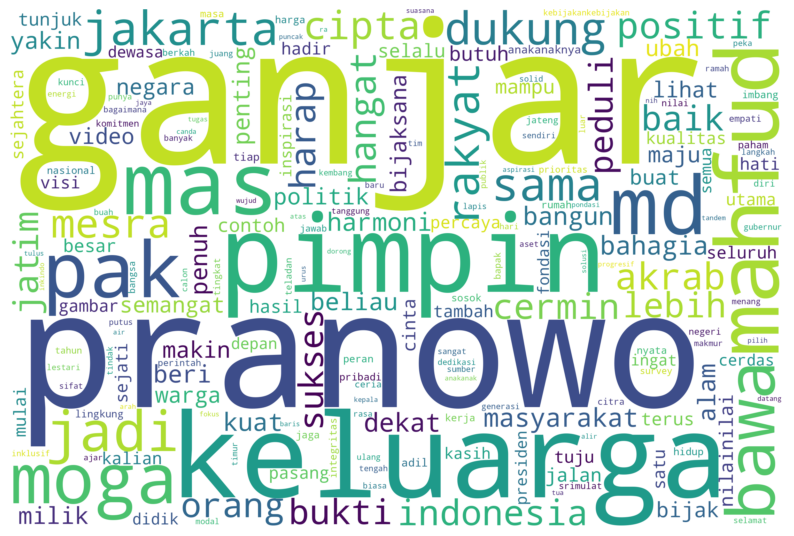

In [148]:
# Import modul WordCloud dan STOPWORDS dari pustaka wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan Word Cloud
def plot_cloud(wordcloud):
    """
    Menampilkan Word Cloud dengan ukuran gambar 10x8 inci.

    Parameters:
    - wordcloud (WordCloud): Objek WordCloud yang akan ditampilkan.
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Menggabungkan semua teks dari kolom 'full_text' dalam DataFrame data menjadi satu string
all_words = ' '.join([tweets for tweets in data['full_text']])

# Membuat objek WordCloud dengan konfigurasi tertentu
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='white',  # Mengubah warna latar belakang menjadi putih
    colormap='viridis',  # Mengganti warna dengan 'viridis'
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

# Menampilkan Word Cloud menggunakan fungsi plot_cloud
plot_cloud(wordcloud)


In [149]:
print(data.columns)


Index(['full_text', 'tweet_english', 'klasifikasi'], dtype='object')


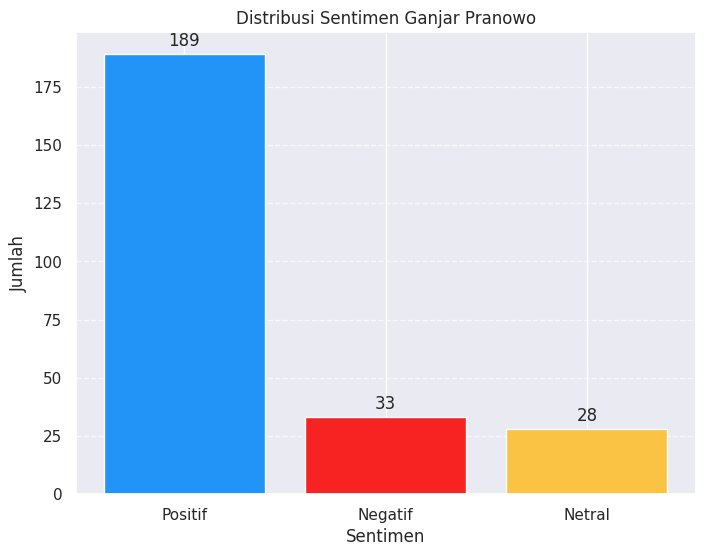

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur tema visualisasi menggunakan Seaborn
sns.set_theme()

# Data untuk membuat diagram batang
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

# Fungsi untuk menampilkan diagram batang
def show_bar_chart(labels, counts, title):
    # Membuat subplot dengan ukuran tertentu
    fig, ax = plt.subplots(figsize=(8, 6))

    # Membuat diagram batang dengan warna tertentu
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan label jumlah di atas setiap batang
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan garis-garis grid pada sumbu y
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menetapkan label sumbu x dan y serta judul diagram
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    # Menampilkan diagram batang
    plt.show()

# Memanggil fungsi untuk menampilkan diagram batang
show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")


### *Klasifikasi Sentimen Naive Bayes Classifier*

Naive Bayes adalah metode klasifikasi statistik yang mengandalkan Teorema Bayes. Dalam konteks analisis sentimen, Naive Bayes mengasumsikan bahwa setiap kata dalam teks adalah fitur yang independen dan berkontribusi terhadap klasifikasi sentimen secara bersamaan. Meskipun asumsi ini sederhana (naive), Naive Bayes sering memberikan hasil yang baik dalam klasifikasi teks

In [151]:
data

,full_text,tweet_english,klasifikasi
0,ganjar pranowo pak mahfud md moga pimpin kalia...,eagerness pranowo pak mahfud md may lead you t...,Netral
1,dukung mas ganjar pak mahfud dukung pimpin pah...,support mas ganjar pak mahfud support to lead ...,Netral
2,ganjar pranowo gubernur jadi inspirasi mampu s...,ganjar pranowo governor can be an inspiration ...,Positif
3,ganjar pranowo mahfud md pimpin komitmen jabat...,eagerness pranowo mahfud md lead not the commi...,Netral
4,sama ganjar mahfud tim kunci hasil maju indonesia,same odd mahfud key team results advanced indo...,Positif
...,...,...,...
245,ganjar pranowo cermin sikap progresif tangan i...,eagle pranowo mirror progressive attitude hand...,Positif
246,orang pimpin cipta harmoni rumah cipta harmoni...,people lead create harmony home definitely cre...,Negatif
247,dekat mas ganjar keluarga gambar hasil orang p...,near Mas ganjar family picture of the results ...,Positif
248,moga energi positif keluarga ganjar pranowo ja...,may the positive energy of the family of ganja...,Positif


In [152]:
# Menghapus kolom 'full_text_original' dari DataFrame 'data' dan menyimpan hasilnya di 'dataset'
dataset = data.drop(['full_text'], axis=1, inplace=False)

# Mengubah DataFrame menjadi list of tuples
dataset = [tuple(x) for x in dataset.to_records(index=False)]


In [153]:
import random

set_positif = []
set_negatif = []
set_netral = []

# Membagi dataset menjadi set_positif, set_negatif, dan set_netral berdasarkan sentimen
for n in dataset:
  if (n[1] == 'Positif'):
    set_positif.append(n)
  elif(n[1] == 'Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append (n)

# Mengambil sampel acak setengah dari setiap kategori sentimen
set_positif = random.sample(set_positif, k=int(len(set_positif) /2))
set_negatif = random.sample(set_negatif, k=int (len (set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len (set_netral)/2))

# Menggabungkan setiap kategori sentimen menjadi satu dataset pelatihan (train)
train = set_positif + set_negatif + set_netral

# Menyimpan dataset pelatihan ke dalam list train_set
train_set = []

# Menggabungkan setengah dari setiap kategori sentimen menjadi satu set data pelatihan (train_set)
for n in train:
  train_set.append(n)

In [154]:
# Membuat dan melatih model klasifikasi Naive Bayes menggunakan TextBlob
from textblob.classifiers import NaiveBayesClassifier

# Membuat dan melatih model klasifikasi Naive Bayes dengan data pelatihan (train_set)
cl = NaiveBayesClassifier(train_set)

# Mengukur akurasi model pada data uji (dataset)
accuracy = cl.accuracy(dataset)

# Menampilkan hasil akurasi model pada data uji
print("Akurasi Test : ", accuracy)


Akurasi Test :  0.812


Proses NaiveBayesClassifier dalam coding di atas dilakukan dengan langkah-langkah berikut:

1. Menghapus Kolom 'full_text':
  *   Menggunakan metode drop pada DataFrame data untuk menghapuS kolom 'full_text'.
  *   Hasilnya disimpan pada DataFrame baru yang disebut dataset.
2. Mengubah DataFrame Menjadi List of Tuples
  * Mengubah DataFrame dataset menjadi list of tuples menggunakan list comprehension dan to_records(index=False).
  * Setiap tuple merepresentasikan satu baris data.
3. Membagi Dataset Menjadi Kategori Sentimen:
  * Membuat tiga set terpisah (set_positif, set_negatif, dan set_netral) berdasarkan kategori sentimen ('Positif', 'Negatif', 'Netral').
4. Mengambil Sampel Acak Setengah dari Setiap Kategori Sentimen:
  * Menggunakan fungsi random.sample untuk mengambil sampel acak setengah dari setiap kategori sentimen.
  * Hasilnya disimpan pada variabel set_positif, set_negatif, dan set_netral.
5. Menggabungkan Setiap Kategori Sentimen Menjadi Satu Dataset Pelatihan (Train):
  * Menggabungkan setengah dari setiap kategori sentimen menjadi satu dataset pelatihan (train) menggunakan operasi penggabungan list (+).
6. Menyimpan Dataset Pelatihan ke dalam List train_set:
  * Membuat list baru (train_set) dan menggabungkan setiap tuple dari dataset pelatihan (train) ke dalam list tersebut.
7. Pelatihan Model Naive Bayes Classifier:
  * Membuat objek model klasifikasi Naive Bayes menggunakan textblob.classifiers.NaiveBayesClassifier(train_set).
  * Model ini dilatih dengan menggunakan dataset pelatihan (train_set) yang sudah disiapkan sebelumnya.

In [155]:
# Import library
from textblob import TextBlob

# Mengambil teks tweet dalam bahasa Inggris dari DataFrame
data_tweet = list(data['tweet_english'])

# Inisialisasi variabel polaritas
polaritas = 0

# Inisialisasi variabel status dan total sentimen
status = []
total_positif = total_negatif = total_netral = total = 0

# Inisialisasi variabel untuk confusion matrix
y_true = []
y_pred = []

# Iterasi melalui setiap tweet dalam data
for i, tweet in enumerate(data_tweet):
    # Melakukan analisis sentimen dengan menggunakan classifier yang sudah di-train
    analysis = TextBlob(tweet, classifier=cl)

    # Menentukan sentimen aktual dan sentimen prediksi
    true_sentiment = dataset[i][1]
    predicted_sentiment = analysis.classify()

    # Menyimpan sentimen aktual dan sentimen prediksi untuk confusion matrix
    y_true.append(true_sentiment)
    y_pred.append(predicted_sentiment)

    # Menghitung jumlah sentimen positif, netral, dan negatif
    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    # Menyimpan sentimen hasil analisis untuk setiap tweet
    status.append(analysis.classify())

    # Menghitung total tweet yang telah di-analisis
    total += 1

# Menampilkan hasil analisis sentimen
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')


Hasil Analisis Data:
Positif = 232
Netral = 6
Negatif = 12

Total Data: 250



Confusion Matrix:
[[187   1   1]
 [ 23   5   0]
 [ 22   0  11]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.92      0.33      0.49        33
      Netral       0.83      0.18      0.29        28
     Positif       0.81      0.99      0.89       189

    accuracy                           0.81       250
   macro avg       0.85      0.50      0.56       250
weighted avg       0.82      0.81      0.77       250



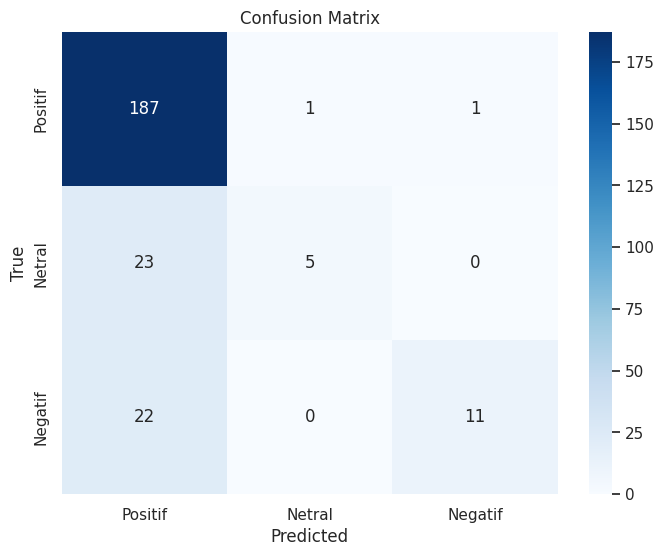

In [156]:
# Import library
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=['Positif', 'Netral', 'Negatif'])

# Menghitung classification report
class_report = classification_report(y_true, y_pred)

# Menampilkan confusion matrix dan classification report
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Positif', 'Netral', 'Negatif'],
            yticklabels=['Positif', 'Netral', 'Negatif'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [157]:
# Membuat DataFrame dari hasil klasifikasi Bayes
status_df = pd.DataFrame({"Klasifikasi Bayes": status})

# Menambahkan kolom 'klasifikasi_bayes' ke dalam DataFrame data
data['klasifikasi_bayes'] = status_df


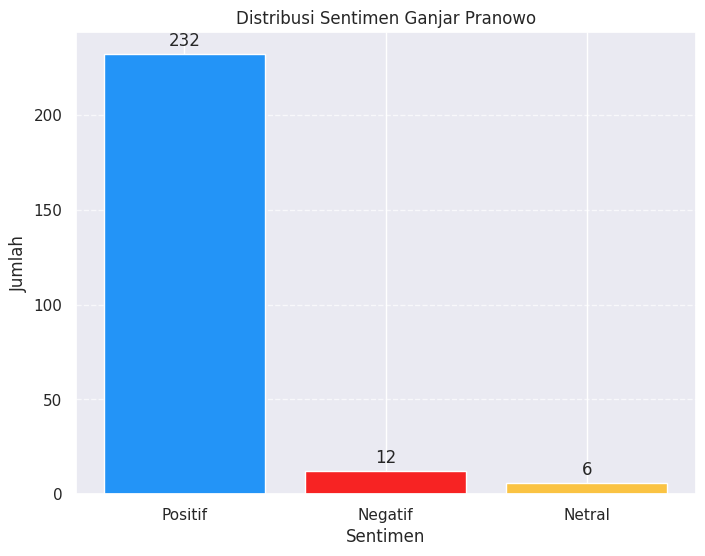

In [158]:
import seaborn as sns

# Setting tema seaborn
sns.set_theme()

# Data untuk plot
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

# Fungsi untuk menampilkan diagram batang
def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan label angka di atas batang
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan label sumbu x, sumbu y, dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    # Menampilkan plot
    plt.show()

# Menjalankan fungsi untuk menampilkan diagram batang
show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")


In [159]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,ganjar pranowo pak mahfud md moga pimpin kalia...,eagerness pranowo pak mahfud md may lead you t...,Netral,Positif
1,dukung mas ganjar pak mahfud dukung pimpin pah...,support mas ganjar pak mahfud support to lead ...,Netral,Positif
2,ganjar pranowo gubernur jadi inspirasi mampu s...,ganjar pranowo governor can be an inspiration ...,Positif,Positif
3,ganjar pranowo mahfud md pimpin komitmen jabat...,eagerness pranowo mahfud md lead not the commi...,Netral,Positif
4,sama ganjar mahfud tim kunci hasil maju indonesia,same odd mahfud key team results advanced indo...,Positif,Positif
...,...,...,...,...
245,ganjar pranowo cermin sikap progresif tangan i...,eagle pranowo mirror progressive attitude hand...,Positif,Positif
246,orang pimpin cipta harmoni rumah cipta harmoni...,people lead create harmony home definitely cre...,Negatif,Positif
247,dekat mas ganjar keluarga gambar hasil orang p...,near Mas ganjar family picture of the results ...,Positif,Positif
248,moga energi positif keluarga ganjar pranowo ja...,may the positive energy of the family of ganja...,Positif,Positif


In [160]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

# Iterasi melalui setiap elemen tuple dalam data_eval
for n in data_eval:
    # Memeriksa apakah tuple memiliki setidaknya 4 elemen
    if len(n) >= 4:
        # Memeriksa apakah elemen ke-2 dan ke-3 dari tuple tidak sama
        if n[2] != n[3]:
            # Menampilkan informasi teks, klasifikasi, dan klasifikasi Bayes yang berbeda
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]}\n')
    else:
        print("Tuple tidak memiliki cukup elemen.")

Text: ganjar pranowo pak mahfud md moga pimpin kalian pancar hangat keluarga
Classifier: Netral
Classifier Bayes: Positif

Text: dukung mas ganjar pak mahfud dukung pimpin paham butuh aspirasi keluarga
Classifier: Netral
Classifier Bayes: Positif

Text: ganjar pranowo mahfud md pimpin komitmen jabat keluarga rakyat
Classifier: Netral
Classifier Bayes: Positif

Text: dukung ganjar mahfud tambah kali dukung datang ulama baris lauhil mahfud se priangan timur gas
Classifier: Negatif
Classifier Bayes: Positif

Text: insana ntt rapat baris dukung ganjarmahfud
Classifier: Netral
Classifier Bayes: Positif

Text: buzzer ganjar ngetag gw
Classifier: Negatif
Classifier Bayes: Positif

Text: keluarga ganjar pranowo cermin harmonis implementasi pimpin negara
Classifier: Negatif
Classifier Bayes: Positif

Text: ganjar pranowo mahfud md sosok milik visi jalan mesra keluarga jadi nilai tambah pimpin
Classifier: Netral
Classifier Bayes: Positif

Text: moga ganjar pranowo pak mahfud md bawa semangat sam